In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


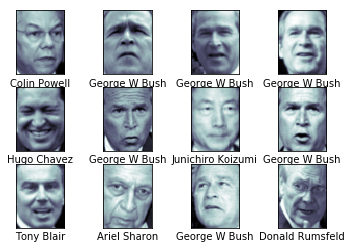

In [2]:
fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [3]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150,whiten=True)
svc = SVC(kernel='rbf',class_weight='balanced')
model = make_pipeline(pca, svc)

In [4]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,random_state=42,
                                                test_size = 0.25)

In [5]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [0.1, 1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]}
grid = GridSearchCV(model, param_grid) #the default 3-fold cross validation

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 1min 53s, sys: 1.77 s, total: 1min 55s
Wall time: 29.1 s
{'svc__C': 10, 'svc__gamma': 0.005}


In [6]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

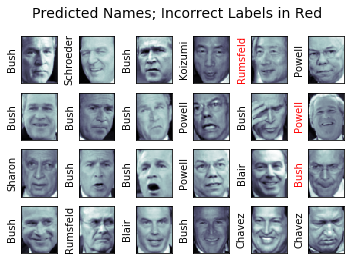

In [7]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [8]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.80      0.89        15
     Colin Powell       0.90      0.88      0.89        68
  Donald Rumsfeld       0.92      0.74      0.82        31
    George W Bush       0.80      0.98      0.88       126
Gerhard Schroeder       0.88      0.91      0.89        23
      Hugo Chavez       1.00      0.75      0.86        20
Junichiro Koizumi       1.00      0.83      0.91        12
       Tony Blair       0.97      0.71      0.82        42

      avg / total       0.89      0.87      0.87       337



/Users/cschen/anaconda/lib/python3.6/site-packages/seaborn/matrix.py:143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xticklabels == []:
/Users/cschen/anaconda/lib/python3.6/site-packages/seaborn/matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


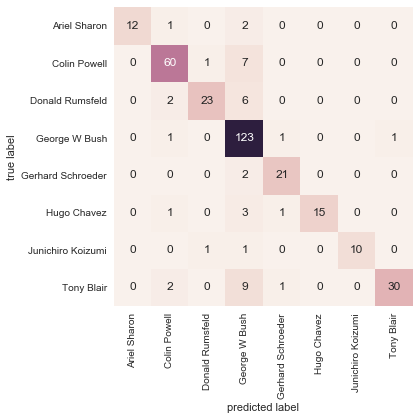

In [9]:
from sklearn.metrics import confusion_matrix
# use seaborn plotting defaults
import seaborn as sns; sns.set()

mat = confusion_matrix(yfit, ytest)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('predicted label')
plt.ylabel('true label');